## **How well do jobs and skills pay for Data Analysts?**

In [ ]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Loading Data
df = pd.read_csv("C:/Users/user/Desktop/packages/data_jobs.csv")

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_posted_month"] = df["job_posted_date"].dt.strftime("%b")
def cleanup(skill_list):
    if pd.notna(skill_list):
        return ast.literal_eval(skill_list)
    else:
        return skill_list
df["job_skills"] = df["job_skills"].apply(cleanup)

### Salary Distribution by Job Title

In [30]:
# Filter for the job titles and country
df_US = df[df["job_country"] == "United States"].copy()
df_US = df_US.dropna(subset = ["salary_year_avg"])
job_title = df_US["job_title_short"].value_counts().index[:6].tolist()
df_US_top_6 = df_US[df_US["job_title_short"].isin(job_title)]
df_US_top_6

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}",Feb
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr...",Jul
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro...",Oct
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"[r, python, sql, t-sql, hadoop, spark, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['...",Oct
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"[golang, scala, python, java, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin...",Oct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,"Florida, United States",2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"[r, python, matplotlib, ggplot2, spark, word, ...","{'analyst_tools': ['word', 'power bi', 'tablea...",Jan
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"[go, python, r, sql, oracle, windows, alteryx,...","{'analyst_tools': ['alteryx', 'power bi', 'tab...",Aug
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",NaN,NaN,Jan
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':...",Apr


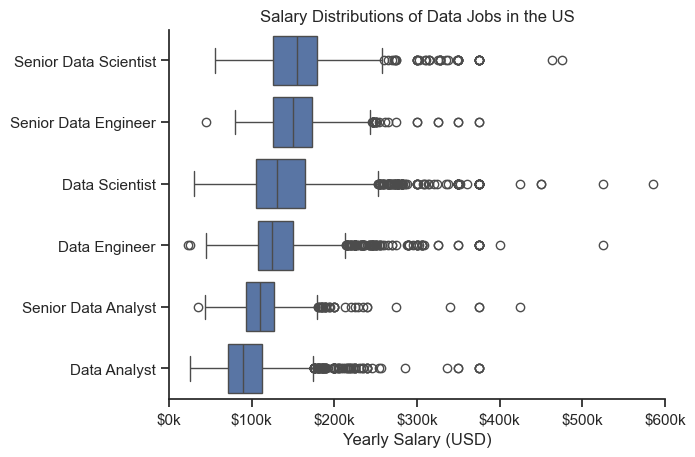

In [ ]:
# Plot salary distributions
job_order = df_US_top_6.groupby("job_title_short")["salary_year_avg"].median().sort_values(ascending = False).index
sns.set_theme(style = "ticks")
sns.boxplot(
    data = df_US_top_6,
    x = "salary_year_avg",
    y = "job_title_short",
    order = job_order
)
plt.title("Salary Distributions of Data Jobs in the US")
plt.xlabel("Yearly Salary (USD)")
plt.ylabel("")
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}k")
plt.gca().xaxis.set_major_formatter(ticks_x)
sns.despine()
plt.show()

### The Highest Paid Skills for Data Analyst

In [66]:
# Top 10 Highest Paid Skills
df_US_DA = df_US[df_US["job_title_short"] == "Data Analyst"].copy()
df_US_DA = df_US_DA.explode("job_skills")
skills = df_US_DA.pivot_table(
    index = "job_skills",
    values = "salary_year_avg",
    aggfunc = "median"
).sort_values(by = "salary_year_avg", ascending = False).head(10)
skills

,salary_year_avg
job_skills,
dplyr,196250.0
bitbucket,189000.0
gitlab,186000.0
solidity,179000.0
hugging face,175000.0
couchbase,160515.0
ansible,159640.0
mxnet,149000.0
cassandra,148250.0


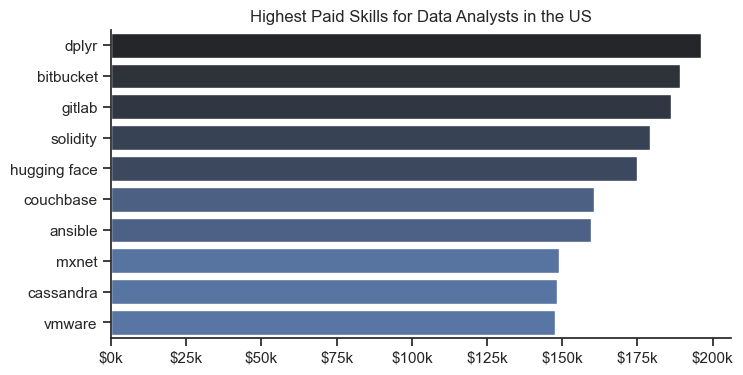

In [68]:
plt.figure(figsize = (8, 4))
sns.set_theme(style = "ticks")
sns.barplot(
    data = skills,
    x = "salary_year_avg",
    y = "job_skills",
    hue = "salary_year_avg",
    palette = "dark:b_r",
)
plt.title("Highest Paid Skills for Data Analysts in the US")
plt.xlabel("")
plt.ylabel("")
plt.legend().remove()
plt.gca().xaxis.set_major_formatter(ticks_x)
sns.despine()
plt.show()